In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import itertools 

In [2]:
# Para ignorar todos los warnings
warnings.filterwarnings("ignore")

Este notebook se centra en el entrenamiento y evaluación de modelos de clasificación. Vamos a hacer dos enfoques distintos para luego compararlos. Por una parte, vamos a usar las características radiómicas originales, y, por la otra, vamos a usar aquellas resultantes de la selección de variables. Para ello, contamos también con la base de datos clínica, la cuál integraremos con las otras bases. 

In [3]:
# Leer el DataFrame de datos radiómicos 
radiomicas_ori = pd.read_excel('C:\\Users\\raque\\Documents\\TFG\\Datos\\radiomicas_filtradas.xlsx')

# Leer el DataFrame de datos radiómicos reducido
#radiomicas_red = pd.read_excel('C:\\Users\\raque\\OneDrive\\Documents\\TFG\\Datos\\radiomicas_reducido.xlsx')

# Leer el DataFrame de datos clínicos
clinicas = pd.read_excel('C:\\Users\\raque\\Documents\\TFG\\Datos\\clinicas_filtradas.xlsx')

## Dataset

Eliminamos las gleason porque ISUP se obtiene a partir de estas variables

In [4]:
gleason = ["lesions_0_gleason1.1", "lesions_0_gleason2.1"]
clinicas = clinicas.drop(gleason, axis=1)

In [5]:
# Combinar con los datos clínicos utilizando la clave 'patient_id'
datos_combinados_ori = pd.merge(radiomicas_ori, clinicas, on='patient_id', how='inner')

In [6]:
# Eliminamos los identificadores
datos_combinados_ori = datos_combinados_ori.iloc[:, 4:]
datos_combinados_ori

,shape_Elongation_Original={},shape_Flatness_Original={},shape_LeastAxisLength_Original={},shape_MajorAxisLength_Original={},shape_Maximum2DDiameterColumn_Original={},shape_Maximum2DDiameterRow_Original={},shape_Maximum2DDiameterSlice_Original={},shape_Maximum3DDiameter_Original={},shape_MeshVolume_Original={},shape_MinorAxisLength_Original={},...,ngtdm_Contrast_Original={},ngtdm_Strength_Original={},age,psas_0_total,lesions_0_pi_rads,ISUP,TZ,PZ,CZ,AS
0,0.570833,0.063041,2.500666,39.667346,36.055513,42.059482,27.073973,43.023250,1405.791667,22.643447,...,0.430100,36.983853,79,9.20,5,4,True,True,False,False
1,0.782129,0.000000,0.000000,30.499445,32.000000,32.249031,25.000000,32.249031,490.916667,23.854492,...,0.610427,171.091157,51,4.54,3,2,False,True,False,False
2,0.701985,0.066268,1.999392,30.171134,29.017236,30.364453,21.023796,30.380915,944.083333,21.179679,...,0.674630,16.698969,61,15.68,3,1,True,False,False,True
3,0.809698,0.045721,1.428056,31.234257,32.015621,32.756679,30.016662,33.541020,800.166667,25.290308,...,0.346667,25.109662,68,9.80,3,2,False,True,False,False
4,0.554691,0.099923,11.908565,119.176949,127.098387,133.015037,82.097503,133.966414,57525.958333,66.106374,...,0.013894,1.949754,70,6.24,5,5,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.853479,0.093747,5.276965,56.289246,63.071388,69.375788,59.304300,69.985713,8551.291667,48.041683,...,0.338165,37.924333,70,12.00,5,3,False,True,False,False
319,0.549582,0.074252,5.225737,70.378355,70.000000,71.021124,43.185646,74.699398,8648.500000,38.678669,...,0.023606,3.560755,50,7.18,5,2,True,False,False,False
320,0.772819,0.105533,3.144168,29.793161,28.000000,34.000000,27.018512,34.000000,1462.416667,23.024731,...,0.368324,48.403519,63,5.92,4,2,False,True,False,False
321,0.753025,0.083470,12.196473,146.117939,191.010471,192.044266,141.428427,192.153584,38240.000000,110.030431,...,0.409059,36.060787,71,6.35,5,3,False,True,False,False


In [7]:
datos_combinados_ori.shape

(323, 115)

# Clasificación 1 (12 vs 345)

In [8]:
# Crear una nueva columna llamada 'ISUP_'
datos_combinados_ori_c1 = datos_combinados_ori.copy()
datos_combinados_ori_c1['ISUP_'] = datos_combinados_ori_c1['ISUP'].apply(lambda x: '0' if x in [1, 2] else '1')

datos_combinados_ori_c1.drop('ISUP', axis=1, inplace=True)

datos_combinados_ori_c1

,shape_Elongation_Original={},shape_Flatness_Original={},shape_LeastAxisLength_Original={},shape_MajorAxisLength_Original={},shape_Maximum2DDiameterColumn_Original={},shape_Maximum2DDiameterRow_Original={},shape_Maximum2DDiameterSlice_Original={},shape_Maximum3DDiameter_Original={},shape_MeshVolume_Original={},shape_MinorAxisLength_Original={},...,ngtdm_Contrast_Original={},ngtdm_Strength_Original={},age,psas_0_total,lesions_0_pi_rads,TZ,PZ,CZ,AS,ISUP_
0,0.570833,0.063041,2.500666,39.667346,36.055513,42.059482,27.073973,43.023250,1405.791667,22.643447,...,0.430100,36.983853,79,9.20,5,True,True,False,False,1
1,0.782129,0.000000,0.000000,30.499445,32.000000,32.249031,25.000000,32.249031,490.916667,23.854492,...,0.610427,171.091157,51,4.54,3,False,True,False,False,0
2,0.701985,0.066268,1.999392,30.171134,29.017236,30.364453,21.023796,30.380915,944.083333,21.179679,...,0.674630,16.698969,61,15.68,3,True,False,False,True,0
3,0.809698,0.045721,1.428056,31.234257,32.015621,32.756679,30.016662,33.541020,800.166667,25.290308,...,0.346667,25.109662,68,9.80,3,False,True,False,False,0
4,0.554691,0.099923,11.908565,119.176949,127.098387,133.015037,82.097503,133.966414,57525.958333,66.106374,...,0.013894,1.949754,70,6.24,5,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.853479,0.093747,5.276965,56.289246,63.071388,69.375788,59.304300,69.985713,8551.291667,48.041683,...,0.338165,37.924333,70,12.00,5,False,True,False,False,1
319,0.549582,0.074252,5.225737,70.378355,70.000000,71.021124,43.185646,74.699398,8648.500000,38.678669,...,0.023606,3.560755,50,7.18,5,True,False,False,False,0
320,0.772819,0.105533,3.144168,29.793161,28.000000,34.000000,27.018512,34.000000,1462.416667,23.024731,...,0.368324,48.403519,63,5.92,4,False,True,False,False,0
321,0.753025,0.083470,12.196473,146.117939,191.010471,192.044266,141.428427,192.153584,38240.000000,110.030431,...,0.409059,36.060787,71,6.35,5,False,True,False,False,1


Vamos a estudiar si las clases están desbalanceadas

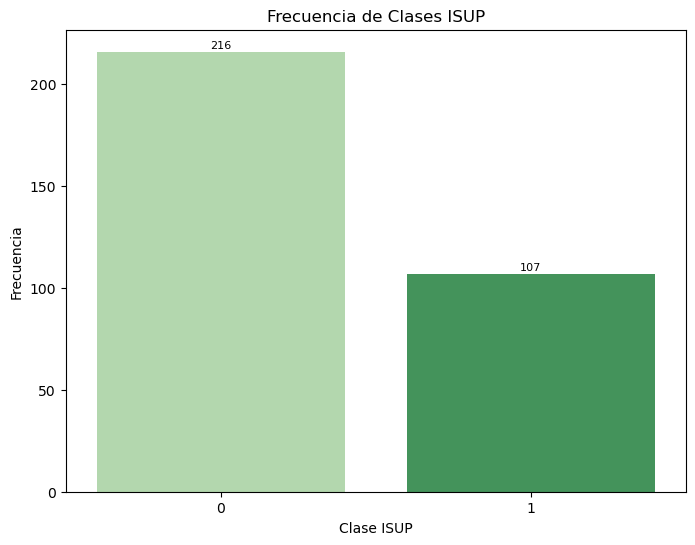

In [9]:
# Calcular la frecuencia de cada clase
frecuencia_clases = datos_combinados_ori_c1['ISUP_'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencia_clases.index, y=frecuencia_clases.values, palette="Greens")

# Agregar etiquetas y título
plt.xlabel('Clase ISUP')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Clases ISUP')

# Agregar etiquetas con las frecuencias en cada barra
for i, v in enumerate(frecuencia_clases.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8, color='black')

# Mostrar el gráfico
plt.show()

## Preparación de datos y estratificación

Vamos a empezar nuestro modelo de clasificación. Queremos predecir la variable categórica `ISUP_`. Esta cuenta con etiquetas 0, 1 que informan sobre la severidad del cáncer. Vamos a escalar nuestras variables continuas y localizar esa variable que será nuestro target. También estratificamos los datos para asegurarnos de que la proporción del target sea la misma en entrenamiento y validación.

In [10]:
# las últimas 6 columnas son categóricas, entonces seleccionamos solo las primeras columnas para escalar
columnas_numericas = datos_combinados_ori_c1.columns[:-6]

# DataFrame solo con las columnas numéricas
datos_numericos = datos_combinados_ori_c1[columnas_numericas]

# scaling
scaler = StandardScaler()
Xsc = scaler.fit_transform(datos_numericos)

# Creamos un DataFrame con los datos escalados y las columnas categóricas originales
X_sc = pd.DataFrame(Xsc, columns=columnas_numericas)
#datos_escalados[columnas_numericas] = datos_numericos

# Añadimos las columnas categóricas al DataFrame escalado
X_sc = pd.concat([X_sc, datos_combinados_ori_c1.iloc[:, -6:]], axis=1)

In [11]:
# Seleccionar el target
X1 = X_sc.drop("ISUP_", axis=1)  # Características
y1 = X_sc.loc[:, 'ISUP_']   # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba, estratificamos
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)

In [12]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(258, 114)
(65, 114)
(258,)
(65,)


## Resample

In [13]:
os1 = ADASYN(sampling_strategy='auto', random_state= 42, n_neighbors= 5)
X_train_os1, y_train_os1 = os1.fit_resample(X_train1, y_train1)
X_test_os1, y_test_os1 = X_test1, y_test1
 
print ("Distribution before resampling {}".format(sorted(Counter(y_train1).items())))
print ("Distribution after resampling {}".format(sorted(Counter(y_train_os1).items())))

Distribution before resampling [('0', 173), ('1', 85)]
Distribution after resampling [('0', 173), ('1', 169)]


In [14]:
print(X_train_os1.shape)
print(X_test_os1.shape)
print(y_train_os1.shape)
print(y_test_os1.shape)

(342, 114)
(65, 114)
(342,)
(65,)


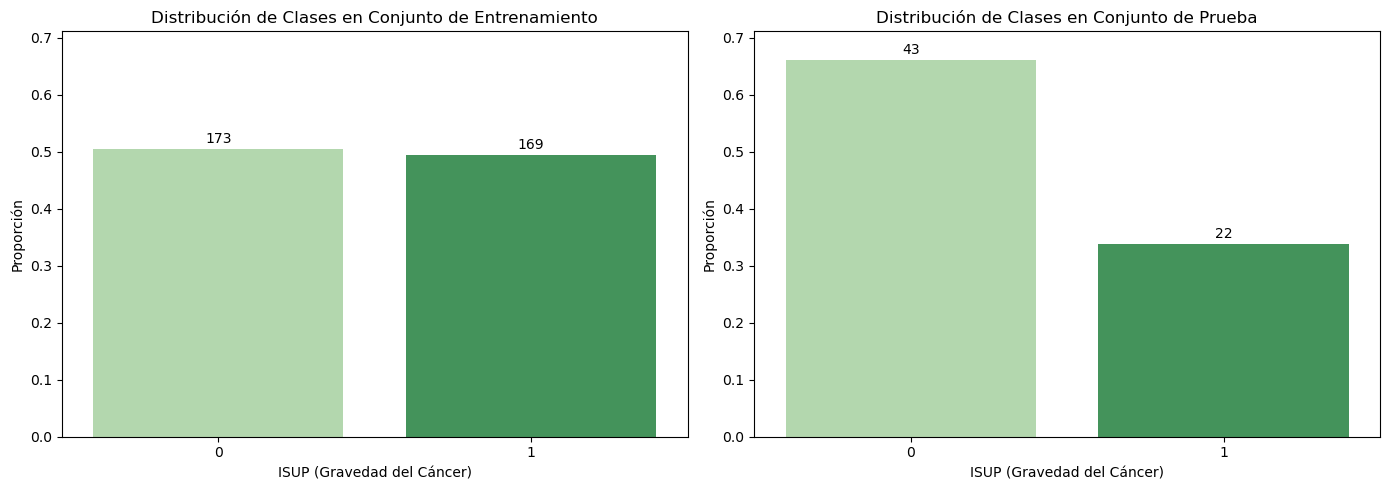

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las proporciones en el conjunto de entrenamiento y prueba
train_class_proportions = y_train_os1.value_counts(normalize=True).sort_index()
test_class_proportions = y_test_os1.value_counts(normalize=True).sort_index()

# Obtener el rango máximo de proporciones
max_proportion = max(train_class_proportions.max(), test_class_proportions.max())

# Visualizar la distribución de clases en el conjunto de entrenamiento y prueba
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Crea la countplot con las proporciones en el eje y
sns.barplot(x=train_class_proportions.index, y=train_class_proportions.values, palette='Greens', ax=axes[0])
axes[0].set_title('Distribución de Clases en Conjunto de Entrenamiento')
axes[0].set_xlabel('ISUP (Gravedad del Cáncer)')
axes[0].set_ylabel('Proporción')
axes[0].set_ylim([0, max_proportion+0.05])  # Establecer el mismo rango en el eje y para ambas gráficas

# Anotar las barras con la frecuencia de cada clase
for index, value in enumerate(train_class_proportions):
    axes[0].text(index, value + 0.01, f'{y_train_os1.value_counts().sort_index().values[index]}', ha='center')

# Conjunto de prueba
sns.barplot(x=test_class_proportions.index, y=test_class_proportions.values, palette='Greens', ax=axes[1])
axes[1].set_title('Distribución de Clases en Conjunto de Prueba')
axes[1].set_xlabel('ISUP (Gravedad del Cáncer)')
axes[1].set_ylabel('Proporción')
axes[1].set_ylim([0, max_proportion+0.05])  # Establecer el mismo rango en el eje y para ambas gráficas

# Anotar las barras con la frecuencia de cada clase
for index, value in enumerate(test_class_proportions):
    axes[1].text(index, value + 0.01, f'{y_test_os1.value_counts().sort_index().values[index]}', ha='center')

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

# Frecuencia de clases en el conjunto de entrenamiento
frecuencia_entrenamiento = y_train_os1.value_counts().sort_index()

# Frecuencia de clases en el conjunto de prueba
frecuencia_prueba = y_test_os1.value_counts().sort_index()

# Calcular proporciones
proporciones_entrenamiento = frecuencia_entrenamiento / len(y_train_os1)
proporciones_prueba = frecuencia_prueba / len(y_test_os1)

# Crear un DataFrame para facilitar la visualización
df_proporciones = pd.DataFrame({
    'ISUP': proporciones_entrenamiento.index,
    'Proporción_Entrenamiento': proporciones_entrenamiento.values,
    'Proporción_Prueba': proporciones_prueba.values
})
df_proporciones

,ISUP,Proporción_Entrenamiento,Proporción_Prueba
0,0,0.505848,0.661538
1,1,0.494152,0.338462


# Clasificación 2 (1 vs 23 vs 45)

In [17]:
# Crear una nueva columna llamada 'ISUP_'
datos_combinados_ori_c2 = datos_combinados_ori.copy()
def asignar_categorias(x):
    if x == 1:
        return 0
    elif x in [2, 3]:
        return 1
    elif x in [4, 5]:
        return 2
    else:
        return None  # Manejo de otros casos, si es necesario

datos_combinados_ori_c2['ISUP_'] = datos_combinados_ori_c2['ISUP'].apply(asignar_categorias)

datos_combinados_ori_c2.drop('ISUP', axis=1, inplace=True)

datos_combinados_ori_c2

,shape_Elongation_Original={},shape_Flatness_Original={},shape_LeastAxisLength_Original={},shape_MajorAxisLength_Original={},shape_Maximum2DDiameterColumn_Original={},shape_Maximum2DDiameterRow_Original={},shape_Maximum2DDiameterSlice_Original={},shape_Maximum3DDiameter_Original={},shape_MeshVolume_Original={},shape_MinorAxisLength_Original={},...,ngtdm_Contrast_Original={},ngtdm_Strength_Original={},age,psas_0_total,lesions_0_pi_rads,TZ,PZ,CZ,AS,ISUP_
0,0.570833,0.063041,2.500666,39.667346,36.055513,42.059482,27.073973,43.023250,1405.791667,22.643447,...,0.430100,36.983853,79,9.20,5,True,True,False,False,2
1,0.782129,0.000000,0.000000,30.499445,32.000000,32.249031,25.000000,32.249031,490.916667,23.854492,...,0.610427,171.091157,51,4.54,3,False,True,False,False,1
2,0.701985,0.066268,1.999392,30.171134,29.017236,30.364453,21.023796,30.380915,944.083333,21.179679,...,0.674630,16.698969,61,15.68,3,True,False,False,True,0
3,0.809698,0.045721,1.428056,31.234257,32.015621,32.756679,30.016662,33.541020,800.166667,25.290308,...,0.346667,25.109662,68,9.80,3,False,True,False,False,1
4,0.554691,0.099923,11.908565,119.176949,127.098387,133.015037,82.097503,133.966414,57525.958333,66.106374,...,0.013894,1.949754,70,6.24,5,False,True,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.853479,0.093747,5.276965,56.289246,63.071388,69.375788,59.304300,69.985713,8551.291667,48.041683,...,0.338165,37.924333,70,12.00,5,False,True,False,False,1
319,0.549582,0.074252,5.225737,70.378355,70.000000,71.021124,43.185646,74.699398,8648.500000,38.678669,...,0.023606,3.560755,50,7.18,5,True,False,False,False,1
320,0.772819,0.105533,3.144168,29.793161,28.000000,34.000000,27.018512,34.000000,1462.416667,23.024731,...,0.368324,48.403519,63,5.92,4,False,True,False,False,1
321,0.753025,0.083470,12.196473,146.117939,191.010471,192.044266,141.428427,192.153584,38240.000000,110.030431,...,0.409059,36.060787,71,6.35,5,False,True,False,False,1


Vamos a estudiar si las clases están desbalanceadas

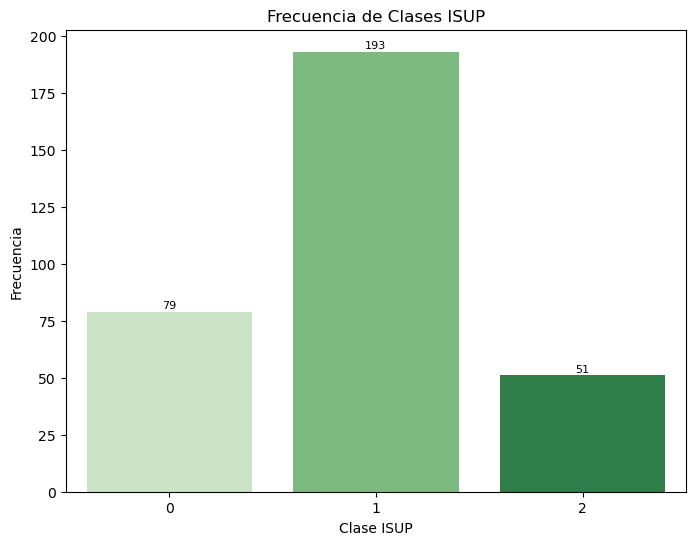

In [18]:
# Calcular la frecuencia de cada clase
frecuencia_clases = datos_combinados_ori_c2['ISUP_'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencia_clases.index, y=frecuencia_clases.values, palette="Greens")

# Agregar etiquetas y título
plt.xlabel('Clase ISUP')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Clases ISUP')

# Agregar etiquetas con las frecuencias en cada barra
for i, v in enumerate(frecuencia_clases.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8, color='black')

# Mostrar el gráfico
plt.show()

## Preparación de datos y estratificación

Vamos a empezar nuestro modelo de clasificación. Queremos predecir la variable categórica `ISUP_`. Esta cuenta con etiquetas 0, 1 que informan sobre la severidad del cáncer. Vamos a escalar nuestras variables continuas y localizar esa variable que será nuestro target. También estratificamos los datos para asegurarnos de que la proporción del target sea la misma en entrenamiento y validación.

In [19]:
# las últimas 6 columnas son categóricas, entonces seleccionamos solo las primeras columnas para escalar
columnas_numericas = datos_combinados_ori_c2.columns[:-6]

# DataFrame solo con las columnas numéricas
datos_numericos = datos_combinados_ori_c2[columnas_numericas]

# scaling
scaler = StandardScaler()
Xsc = scaler.fit_transform(datos_numericos)

# Creamos un DataFrame con los datos escalados y las columnas categóricas originales
X_sc = pd.DataFrame(Xsc, columns=columnas_numericas)
#datos_escalados[columnas_numericas] = datos_numericos

# Añadimos las columnas categóricas al DataFrame escalado
X_sc = pd.concat([X_sc, datos_combinados_ori_c2.iloc[:, -6:]], axis=1)

In [20]:
# Seleccionar el target
X2 = X_sc.drop("ISUP_", axis=1)  # Características
y2 = X_sc.loc[:, 'ISUP_']   # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba, estratificamos
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)

In [21]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(258, 114)
(65, 114)
(258,)
(65,)


## Resample

In [22]:
os2 = ADASYN(sampling_strategy='auto', random_state= 42, n_neighbors= 5)
X_train_os2, y_train_os2 = os2.fit_resample(X_train2, y_train2)
X_test_os2, y_test_os2 = X_test2, y_test2
 
print ("Distribution before resampling {}".format(sorted(Counter(y_train2).items())))
print ("Distribution after resampling {}".format(sorted(Counter(y_train_os2).items())))

Distribution before resampling [(0, 63), (1, 154), (2, 41)]
Distribution after resampling [(0, 154), (1, 154), (2, 156)]


In [23]:
print(X_train_os2.shape)
print(X_test_os2.shape)
print(y_train_os2.shape)
print(y_test_os2.shape)

(464, 114)
(65, 114)
(464,)
(65,)


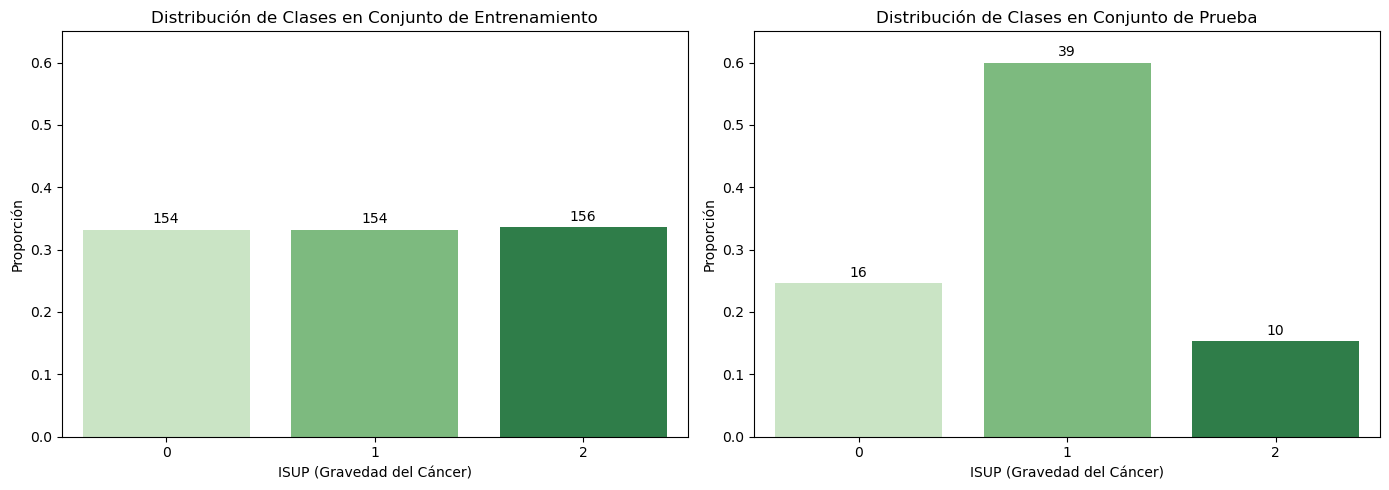

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las proporciones en el conjunto de entrenamiento y prueba
train_class_proportions = y_train_os2.value_counts(normalize=True).sort_index()
test_class_proportions = y_test_os2.value_counts(normalize=True).sort_index()

# Obtener el rango máximo de proporciones
max_proportion = max(train_class_proportions.max(), test_class_proportions.max())

# Visualizar la distribución de clases en el conjunto de entrenamiento y prueba
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Crea la countplot con las proporciones en el eje y
sns.barplot(x=train_class_proportions.index, y=train_class_proportions.values, palette='Greens', ax=axes[0])
axes[0].set_title('Distribución de Clases en Conjunto de Entrenamiento')
axes[0].set_xlabel('ISUP (Gravedad del Cáncer)')
axes[0].set_ylabel('Proporción')
axes[0].set_ylim([0, max_proportion+0.05])  # Establecer el mismo rango en el eje y para ambas gráficas

# Anotar las barras con la frecuencia de cada clase
for index, value in enumerate(train_class_proportions):
    axes[0].text(index, value + 0.01, f'{y_train_os2.value_counts().sort_index().values[index]}', ha='center')

# Conjunto de prueba
sns.barplot(x=test_class_proportions.index, y=test_class_proportions.values, palette='Greens', ax=axes[1])
axes[1].set_title('Distribución de Clases en Conjunto de Prueba')
axes[1].set_xlabel('ISUP (Gravedad del Cáncer)')
axes[1].set_ylabel('Proporción')
axes[1].set_ylim([0, max_proportion+0.05])  # Establecer el mismo rango en el eje y para ambas gráficas

# Anotar las barras con la frecuencia de cada clase
for index, value in enumerate(test_class_proportions):
    axes[1].text(index, value + 0.01, f'{y_test_os2.value_counts().sort_index().values[index]}', ha='center')

plt.tight_layout()
plt.show()

In [25]:
import pandas as pd

# Frecuencia de clases en el conjunto de entrenamiento
frecuencia_entrenamiento = y_train_os2.value_counts().sort_index()

# Frecuencia de clases en el conjunto de prueba
frecuencia_prueba = y_test_os2.value_counts().sort_index()

# Calcular proporciones
proporciones_entrenamiento = frecuencia_entrenamiento / len(y_train_os2)
proporciones_prueba = frecuencia_prueba / len(y_test_os2)

# Crear un DataFrame para facilitar la visualización
df_proporciones = pd.DataFrame({
    'ISUP': proporciones_entrenamiento.index,
    'Proporción_Entrenamiento': proporciones_entrenamiento.values,
    'Proporción_Prueba': proporciones_prueba.values
})
df_proporciones

,ISUP,Proporción_Entrenamiento,Proporción_Prueba
0,0,0.331897,0.246154
1,1,0.331897,0.600000
2,2,0.336207,0.153846


# Clasificación 3 (1 vs 2 vs 345)

In [26]:
# Crear una nueva columna llamada 'ISUP_'
datos_combinados_ori_c3 = datos_combinados_ori.copy()
def asignar_categorias(x):
    if x == 1:
        return 0
    elif x == 2:
        return 1
    elif x in [3, 4, 5]:
        return 2
    else:
        return None  # Manejo de otros casos, si es necesario

datos_combinados_ori_c3['ISUP_'] = datos_combinados_ori_c3['ISUP'].apply(asignar_categorias)

datos_combinados_ori_c3.drop('ISUP', axis=1, inplace=True)

datos_combinados_ori_c3

,shape_Elongation_Original={},shape_Flatness_Original={},shape_LeastAxisLength_Original={},shape_MajorAxisLength_Original={},shape_Maximum2DDiameterColumn_Original={},shape_Maximum2DDiameterRow_Original={},shape_Maximum2DDiameterSlice_Original={},shape_Maximum3DDiameter_Original={},shape_MeshVolume_Original={},shape_MinorAxisLength_Original={},...,ngtdm_Contrast_Original={},ngtdm_Strength_Original={},age,psas_0_total,lesions_0_pi_rads,TZ,PZ,CZ,AS,ISUP_
0,0.570833,0.063041,2.500666,39.667346,36.055513,42.059482,27.073973,43.023250,1405.791667,22.643447,...,0.430100,36.983853,79,9.20,5,True,True,False,False,2
1,0.782129,0.000000,0.000000,30.499445,32.000000,32.249031,25.000000,32.249031,490.916667,23.854492,...,0.610427,171.091157,51,4.54,3,False,True,False,False,1
2,0.701985,0.066268,1.999392,30.171134,29.017236,30.364453,21.023796,30.380915,944.083333,21.179679,...,0.674630,16.698969,61,15.68,3,True,False,False,True,0
3,0.809698,0.045721,1.428056,31.234257,32.015621,32.756679,30.016662,33.541020,800.166667,25.290308,...,0.346667,25.109662,68,9.80,3,False,True,False,False,1
4,0.554691,0.099923,11.908565,119.176949,127.098387,133.015037,82.097503,133.966414,57525.958333,66.106374,...,0.013894,1.949754,70,6.24,5,False,True,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.853479,0.093747,5.276965,56.289246,63.071388,69.375788,59.304300,69.985713,8551.291667,48.041683,...,0.338165,37.924333,70,12.00,5,False,True,False,False,2
319,0.549582,0.074252,5.225737,70.378355,70.000000,71.021124,43.185646,74.699398,8648.500000,38.678669,...,0.023606,3.560755,50,7.18,5,True,False,False,False,1
320,0.772819,0.105533,3.144168,29.793161,28.000000,34.000000,27.018512,34.000000,1462.416667,23.024731,...,0.368324,48.403519,63,5.92,4,False,True,False,False,1
321,0.753025,0.083470,12.196473,146.117939,191.010471,192.044266,141.428427,192.153584,38240.000000,110.030431,...,0.409059,36.060787,71,6.35,5,False,True,False,False,2


Vamos a estudiar si las clases están desbalanceadas

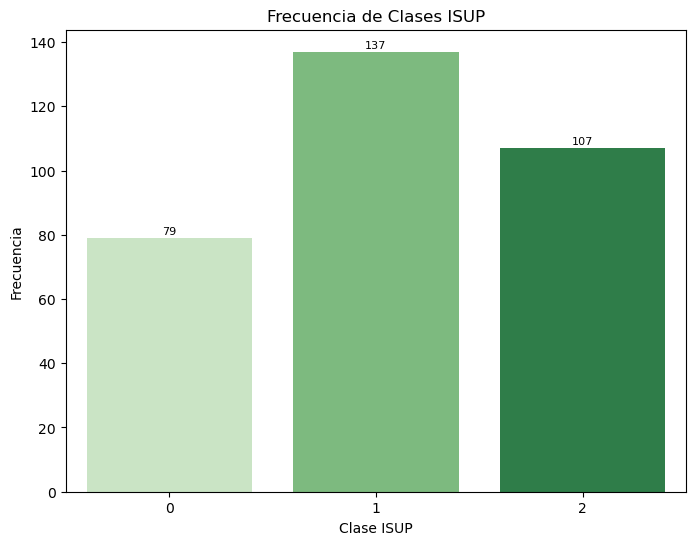

In [27]:
# Calcular la frecuencia de cada clase
frecuencia_clases = datos_combinados_ori_c3['ISUP_'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencia_clases.index, y=frecuencia_clases.values, palette="Greens")
# Agregar etiquetas y título
plt.xlabel('Clase ISUP')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Clases ISUP')

# Agregar etiquetas con las frecuencias en cada barra
for i, v in enumerate(frecuencia_clases.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8, color='black')

# Mostrar el gráfico
plt.show()

## Preparación de datos y estratificación

Vamos a empezar nuestro modelo de clasificación. Queremos predecir la variable categórica `ISUP_`. Esta cuenta con etiquetas 0, 1 que informan sobre la severidad del cáncer. Vamos a escalar nuestras variables continuas y localizar esa variable que será nuestro target. También estratificamos los datos para asegurarnos de que la proporción del target sea la misma en entrenamiento y validación.

In [28]:
# las últimas 6 columnas son categóricas, entonces seleccionamos solo las primeras columnas para escalar
columnas_numericas = datos_combinados_ori_c3.columns[:-6]

# DataFrame solo con las columnas numéricas
datos_numericos = datos_combinados_ori_c3[columnas_numericas]

# scaling
scaler = StandardScaler()
Xsc = scaler.fit_transform(datos_numericos)

# Creamos un DataFrame con los datos escalados y las columnas categóricas originales
X_sc = pd.DataFrame(Xsc, columns=columnas_numericas)
#datos_escalados[columnas_numericas] = datos_numericos

# Añadimos las columnas categóricas al DataFrame escalado
X_sc = pd.concat([X_sc, datos_combinados_ori_c3.iloc[:, -6:]], axis=1)

In [29]:
# Seleccionar el target
X3 = X_sc.drop("ISUP_", axis=1)  # Características
y3 = X_sc.loc[:, 'ISUP_']   # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba, estratificamos
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, stratify=y3, random_state=42)

In [30]:
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(258, 114)
(65, 114)
(258,)
(65,)


## Resample

In [31]:
os3 = ADASYN(sampling_strategy='minority', random_state= 42, n_neighbors= 5)
X_train_os3, y_train_os3 = os3.fit_resample(X_train3, y_train3)
X_test_os3, y_test_os3 = X_test3, y_test3
 
print ("Distribution before resampling {}".format(sorted(Counter(y_train3).items())))
print ("Distribution after resampling {}".format(sorted(Counter(y_train_os3).items())))

Distribution before resampling [(0, 63), (1, 109), (2, 86)]
Distribution after resampling [(0, 109), (1, 109), (2, 86)]


In [32]:
print(X_train_os3.shape)
print(X_test_os3.shape)
print(y_train_os3.shape)
print(y_test_os3.shape)

(304, 114)
(65, 114)
(304,)
(65,)


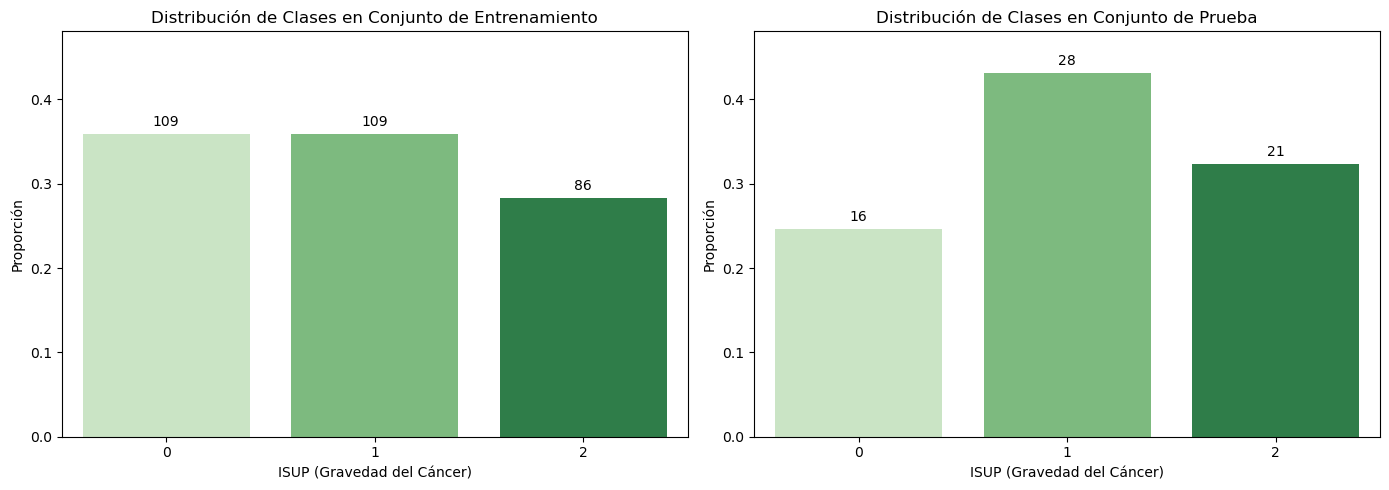

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las proporciones en el conjunto de entrenamiento y prueba
train_class_proportions = y_train_os3.value_counts(normalize=True).sort_index()
test_class_proportions = y_test_os3.value_counts(normalize=True).sort_index()

# Obtener el rango máximo de proporciones
max_proportion = max(train_class_proportions.max(), test_class_proportions.max())

# Visualizar la distribución de clases en el conjunto de entrenamiento y prueba
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Crea la countplot con las proporciones en el eje y
sns.barplot(x=train_class_proportions.index, y=train_class_proportions.values, palette='Greens', ax=axes[0])
axes[0].set_title('Distribución de Clases en Conjunto de Entrenamiento')
axes[0].set_xlabel('ISUP (Gravedad del Cáncer)')
axes[0].set_ylabel('Proporción')
axes[0].set_ylim([0, max_proportion+0.05])  # Establecer el mismo rango en el eje y para ambas gráficas

# Anotar las barras con la frecuencia de cada clase
for index, value in enumerate(train_class_proportions):
    axes[0].text(index, value + 0.01, f'{y_train_os3.value_counts().sort_index().values[index]}', ha='center')

# Conjunto de prueba
sns.barplot(x=test_class_proportions.index, y=test_class_proportions.values, palette='Greens', ax=axes[1])
axes[1].set_title('Distribución de Clases en Conjunto de Prueba')
axes[1].set_xlabel('ISUP (Gravedad del Cáncer)')
axes[1].set_ylabel('Proporción')
axes[1].set_ylim([0, max_proportion+0.05])  # Establecer el mismo rango en el eje y para ambas gráficas

# Anotar las barras con la frecuencia de cada clase
for index, value in enumerate(test_class_proportions):
    axes[1].text(index, value + 0.01, f'{y_test_os3.value_counts().sort_index().values[index]}', ha='center')

plt.tight_layout()
plt.show()

In [34]:
import pandas as pd

# Frecuencia de clases en el conjunto de entrenamiento
frecuencia_entrenamiento = y_train_os3.value_counts().sort_index()

# Frecuencia de clases en el conjunto de prueba
frecuencia_prueba = y_test_os3.value_counts().sort_index()

# Calcular proporciones
proporciones_entrenamiento = frecuencia_entrenamiento / len(y_train_os3)
proporciones_prueba = frecuencia_prueba / len(y_test_os3)

# Crear un DataFrame para facilitar la visualización
df_proporciones = pd.DataFrame({
    'ISUP': proporciones_entrenamiento.index,
    'Proporción_Entrenamiento': proporciones_entrenamiento.values,
    'Proporción_Prueba': proporciones_prueba.values
})
df_proporciones

,ISUP,Proporción_Entrenamiento,Proporción_Prueba
0,0,0.358553,0.246154
1,1,0.358553,0.430769
2,2,0.282895,0.323077


# Clasificación 4 (123 vs 45)

In [35]:
# Crear una nueva columna llamada 'ISUP_'
datos_combinados_ori_c4 = datos_combinados_ori.copy()
datos_combinados_ori_c4['ISUP_'] = datos_combinados_ori_c4['ISUP'].apply(lambda x: '0' if x in [1, 2, 3] else '1')

datos_combinados_ori_c4.drop('ISUP', axis=1, inplace=True)

datos_combinados_ori_c4

,shape_Elongation_Original={},shape_Flatness_Original={},shape_LeastAxisLength_Original={},shape_MajorAxisLength_Original={},shape_Maximum2DDiameterColumn_Original={},shape_Maximum2DDiameterRow_Original={},shape_Maximum2DDiameterSlice_Original={},shape_Maximum3DDiameter_Original={},shape_MeshVolume_Original={},shape_MinorAxisLength_Original={},...,ngtdm_Contrast_Original={},ngtdm_Strength_Original={},age,psas_0_total,lesions_0_pi_rads,TZ,PZ,CZ,AS,ISUP_
0,0.570833,0.063041,2.500666,39.667346,36.055513,42.059482,27.073973,43.023250,1405.791667,22.643447,...,0.430100,36.983853,79,9.20,5,True,True,False,False,1
1,0.782129,0.000000,0.000000,30.499445,32.000000,32.249031,25.000000,32.249031,490.916667,23.854492,...,0.610427,171.091157,51,4.54,3,False,True,False,False,0
2,0.701985,0.066268,1.999392,30.171134,29.017236,30.364453,21.023796,30.380915,944.083333,21.179679,...,0.674630,16.698969,61,15.68,3,True,False,False,True,0
3,0.809698,0.045721,1.428056,31.234257,32.015621,32.756679,30.016662,33.541020,800.166667,25.290308,...,0.346667,25.109662,68,9.80,3,False,True,False,False,0
4,0.554691,0.099923,11.908565,119.176949,127.098387,133.015037,82.097503,133.966414,57525.958333,66.106374,...,0.013894,1.949754,70,6.24,5,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.853479,0.093747,5.276965,56.289246,63.071388,69.375788,59.304300,69.985713,8551.291667,48.041683,...,0.338165,37.924333,70,12.00,5,False,True,False,False,0
319,0.549582,0.074252,5.225737,70.378355,70.000000,71.021124,43.185646,74.699398,8648.500000,38.678669,...,0.023606,3.560755,50,7.18,5,True,False,False,False,0
320,0.772819,0.105533,3.144168,29.793161,28.000000,34.000000,27.018512,34.000000,1462.416667,23.024731,...,0.368324,48.403519,63,5.92,4,False,True,False,False,0
321,0.753025,0.083470,12.196473,146.117939,191.010471,192.044266,141.428427,192.153584,38240.000000,110.030431,...,0.409059,36.060787,71,6.35,5,False,True,False,False,0


Vamos a estudiar si las clases están desbalanceadas

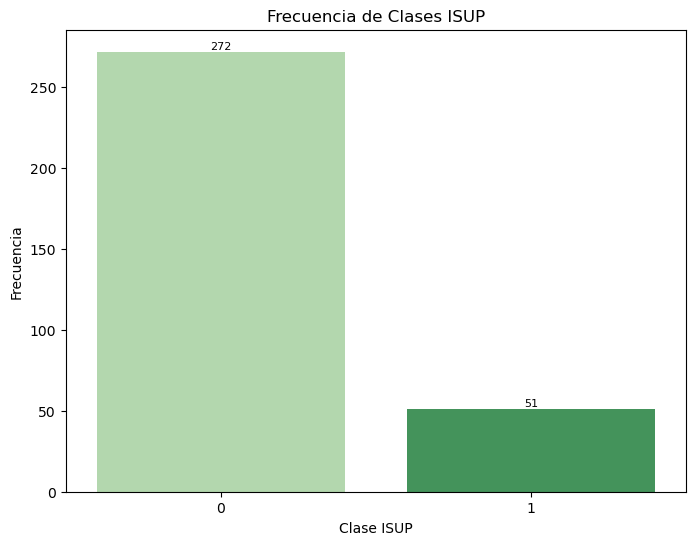

In [36]:
# Calcular la frecuencia de cada clase
frecuencia_clases = datos_combinados_ori_c4['ISUP_'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencia_clases.index, y=frecuencia_clases.values, palette="Greens")

# Agregar etiquetas y título
plt.xlabel('Clase ISUP')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Clases ISUP')

# Agregar etiquetas con las frecuencias en cada barra
for i, v in enumerate(frecuencia_clases.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8, color='black')

# Mostrar el gráfico
plt.show()

## Preparación de datos y estratificación

Vamos a empezar nuestro modelo de clasificación. Queremos predecir la variable categórica `ISUP_`. Esta cuenta con etiquetas 0, 1 que informan sobre la severidad del cáncer. Vamos a escalar nuestras variables continuas y localizar esa variable que será nuestro target. También estratificamos los datos para asegurarnos de que la proporción del target sea la misma en entrenamiento y validación.

In [37]:
# las últimas 6 columnas son categóricas, entonces seleccionamos solo las primeras columnas para escalar
columnas_numericas = datos_combinados_ori_c4.columns[:-6]

# DataFrame solo con las columnas numéricas
datos_numericos = datos_combinados_ori_c4[columnas_numericas]

# scaling
scaler = StandardScaler()
Xsc = scaler.fit_transform(datos_numericos)

# Creamos un DataFrame con los datos escalados y las columnas categóricas originales
X_sc = pd.DataFrame(Xsc, columns=columnas_numericas)
#datos_escalados[columnas_numericas] = datos_numericos

# Añadimos las columnas categóricas al DataFrame escalado
X_sc = pd.concat([X_sc, datos_combinados_ori_c4.iloc[:, -6:]], axis=1)

In [38]:
# Seleccionar el target
X4 = X_sc.drop("ISUP_", axis=1)  # Características
y4 = X_sc.loc[:, 'ISUP_']   # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba, estratificamos
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, stratify=y4, random_state=42)

In [39]:
print(X_train4.shape)
print(X_test4.shape)
print(y_train4.shape)
print(y_test4.shape)

(258, 114)
(65, 114)
(258,)
(65,)


## Resample

In [40]:
os4 = ADASYN(sampling_strategy='auto', random_state= 42, n_neighbors= 5)
X_train_os4, y_train_os4 = os4.fit_resample(X_train4, y_train4)
X_test_os4, y_test_os4 = X_test4, y_test4
 
print ("Distribution before resampling {}".format(sorted(Counter(y_train4).items())))
print ("Distribution after resampling {}".format(sorted(Counter(y_train_os4).items())))

Distribution before resampling [('0', 217), ('1', 41)]
Distribution after resampling [('0', 217), ('1', 204)]


In [41]:
print(X_train_os4.shape)
print(X_test_os4.shape)
print(y_train_os4.shape)
print(y_test_os4.shape)

(421, 114)
(65, 114)
(421,)
(65,)


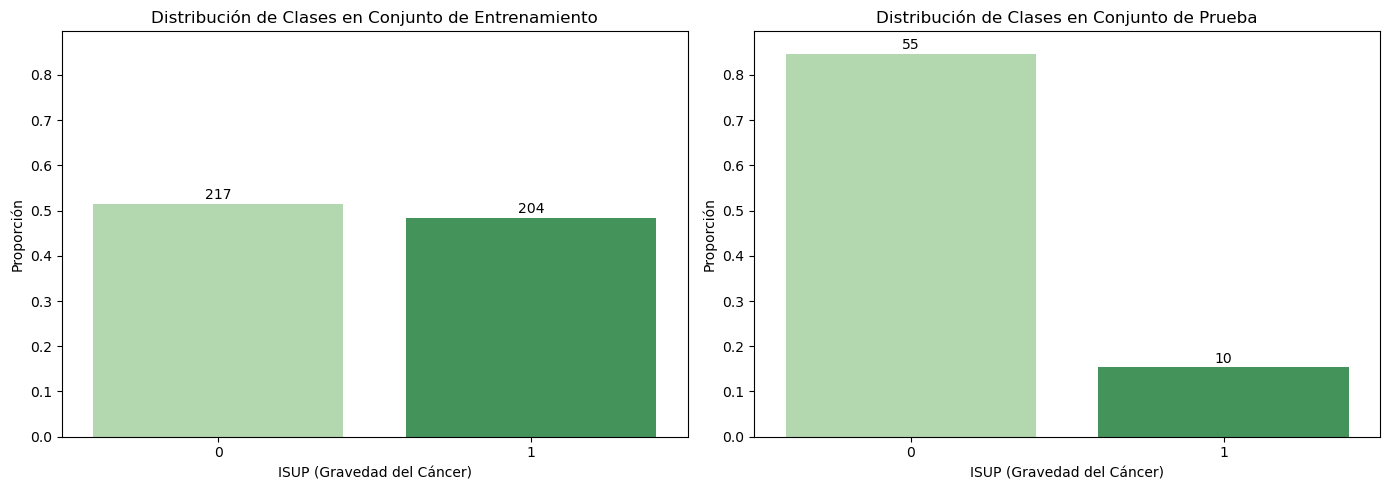

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las proporciones en el conjunto de entrenamiento y prueba
train_class_proportions = y_train_os4.value_counts(normalize=True).sort_index()
test_class_proportions = y_test_os4.value_counts(normalize=True).sort_index()

# Obtener el rango máximo de proporciones
max_proportion = max(train_class_proportions.max(), test_class_proportions.max())

# Visualizar la distribución de clases en el conjunto de entrenamiento y prueba
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Crea la countplot con las proporciones en el eje y
sns.barplot(x=train_class_proportions.index, y=train_class_proportions.values, palette='Greens', ax=axes[0])
axes[0].set_title('Distribución de Clases en Conjunto de Entrenamiento')
axes[0].set_xlabel('ISUP (Gravedad del Cáncer)')
axes[0].set_ylabel('Proporción')
axes[0].set_ylim([0, max_proportion+0.05])  # Establecer el mismo rango en el eje y para ambas gráficas

# Anotar las barras con la frecuencia de cada clase
for index, value in enumerate(train_class_proportions):
    axes[0].text(index, value + 0.01, f'{y_train_os4.value_counts().sort_index().values[index]}', ha='center')

# Conjunto de prueba
sns.barplot(x=test_class_proportions.index, y=test_class_proportions.values, palette='Greens', ax=axes[1])
axes[1].set_title('Distribución de Clases en Conjunto de Prueba')
axes[1].set_xlabel('ISUP (Gravedad del Cáncer)')
axes[1].set_ylabel('Proporción')
axes[1].set_ylim([0, max_proportion+0.05])  # Establecer el mismo rango en el eje y para ambas gráficas

# Anotar las barras con la frecuencia de cada clase
for index, value in enumerate(test_class_proportions):
    axes[1].text(index, value + 0.01, f'{y_test_os4.value_counts().sort_index().values[index]}', ha='center')

plt.tight_layout()
plt.show()

In [43]:
import pandas as pd

# Frecuencia de clases en el conjunto de entrenamiento
frecuencia_entrenamiento = y_train_os4.value_counts().sort_index()

# Frecuencia de clases en el conjunto de prueba
frecuencia_prueba = y_test_os4.value_counts().sort_index()

# Calcular proporciones
proporciones_entrenamiento = frecuencia_entrenamiento / len(y_train_os4)
proporciones_prueba = frecuencia_prueba / len(y_test_os4)
y_test_os4
# Crear un DataFrame para facilitar la visualización
df_proporciones = pd.DataFrame({
    'ISUP': proporciones_entrenamiento.index,
    'Proporción_Entrenamiento': proporciones_entrenamiento.values,
    'Proporción_Prueba': proporciones_prueba.values
})
df_proporciones

,ISUP,Proporción_Entrenamiento,Proporción_Prueba
0,0,0.515439,0.846154
1,1,0.484561,0.153846
